In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# EDA

In [22]:
df = pd.read_csv(r'kaggle/heart.csv')

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0.23
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0.37
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0.24
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0.28
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0.21


In [24]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.536390
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.285822
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.260000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,0.710000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,0.810000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.900000


In [25]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 112.2 KB


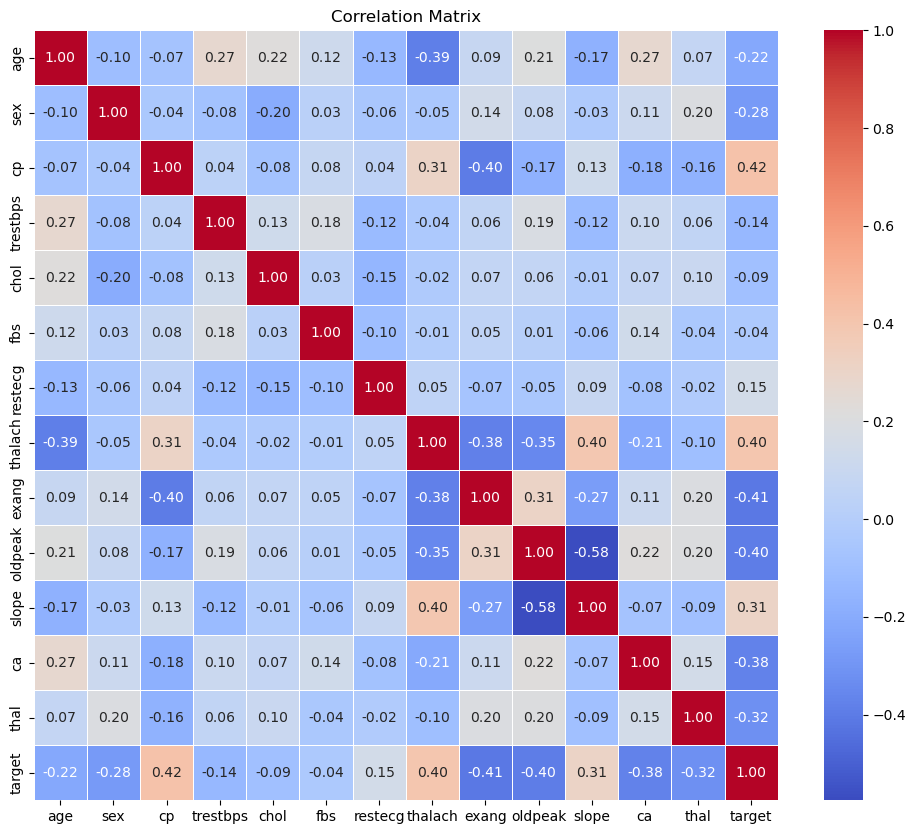

In [26]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

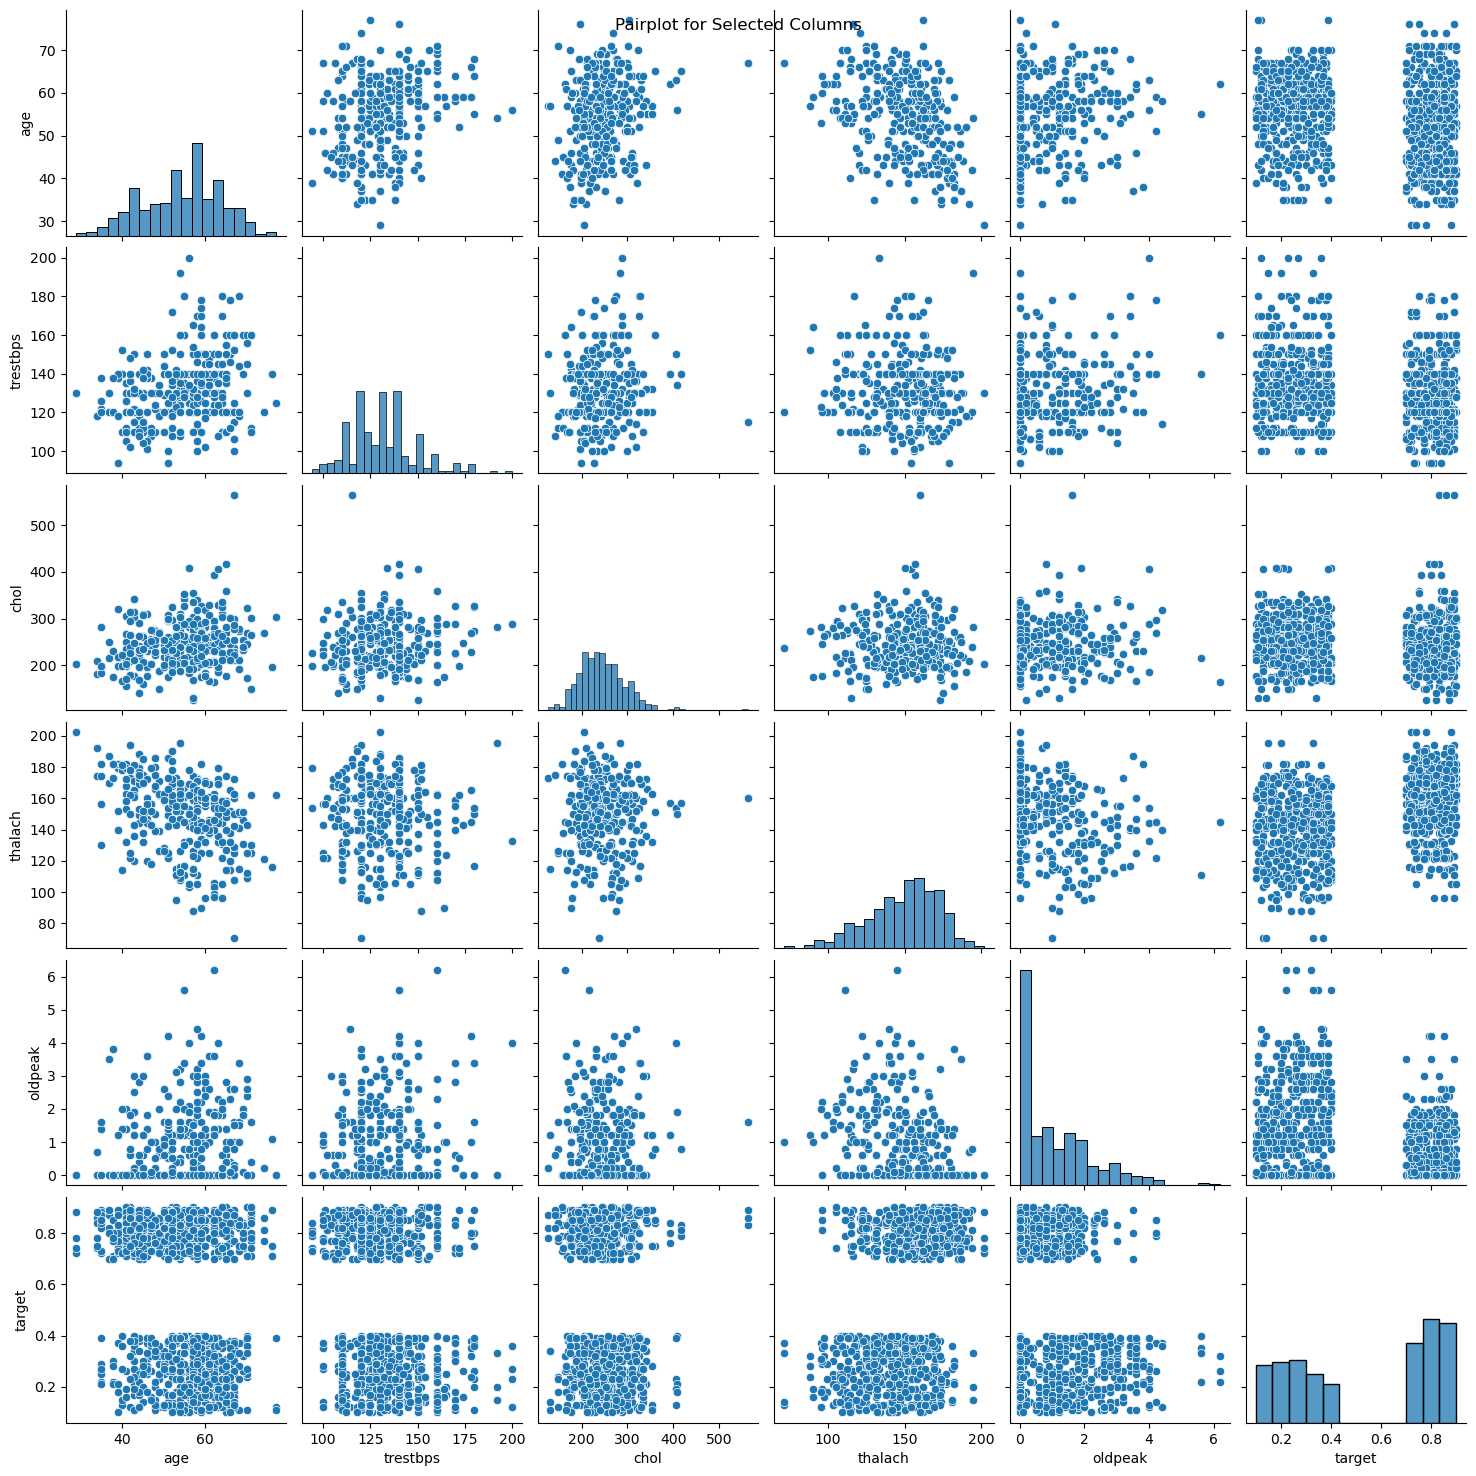

In [27]:
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']])
plt.suptitle('Pairplot for Selected Columns')
plt.show()

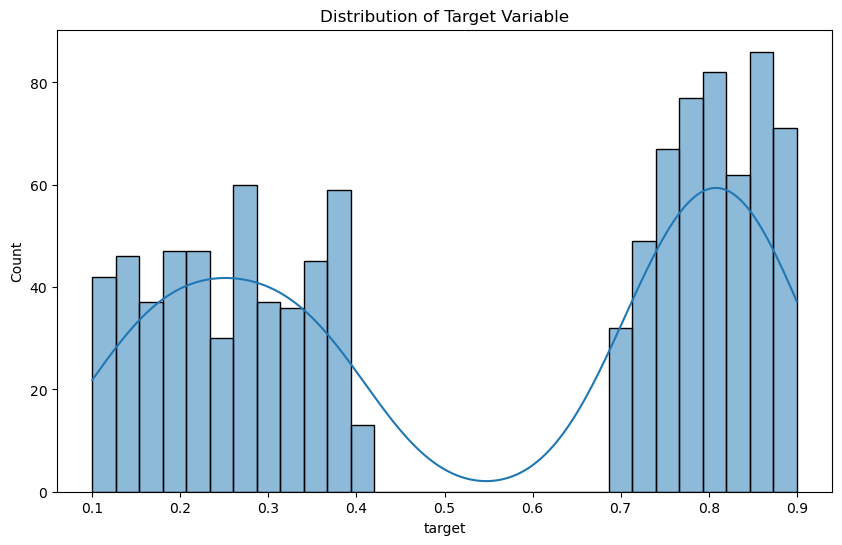

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(df['target'], bins=30, kde=True)
plt.title('Distribution of Target Variable')
plt.show()

In [29]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ANN

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  
])

c:\Users\nsyme\radioconda\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=80, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/80
21/21 - 2s - 85ms/step - loss: 0.3275 - val_loss: 0.1439
Epoch 2/80
21/21 - 0s - 8ms/step - loss: 0.0791 - val_loss: 0.0922
Epoch 3/80
21/21 - 0s - 7ms/step - loss: 0.0553 - val_loss: 0.0724
Epoch 4/80
21/21 - 0s - 7ms/step - loss: 0.0454 - val_loss: 0.0633
Epoch 5/80
21/21 - 0s - 7ms/step - loss: 0.0392 - val_loss: 0.0582
Epoch 6/80
21/21 - 0s - 8ms/step - loss: 0.0348 - val_loss: 0.0533
Epoch 7/80
21/21 - 0s - 7ms/step - loss: 0.0310 - val_loss: 0.0496
Epoch 8/80
21/21 - 0s - 7ms/step - loss: 0.0279 - val_loss: 0.0455
Epoch 9/80
21/21 - 0s - 10ms/step - loss: 0.0256 - val_loss: 0.0430
Epoch 10/80
21/21 - 0s - 10ms/step - loss: 0.0246 - val_loss: 0.0412
Epoch 11/80
21/21 - 0s - 11ms/step - loss: 0.0220 - val_loss: 0.0403
Epoch 12/80
21/21 - 0s - 8ms/step - loss: 0.0208 - val_loss: 0.0368
Epoch 13/80
21/21 - 0s - 9ms/step - loss: 0.0190 - val_loss: 0.0359
Epoch 14/80
21/21 - 0s - 8ms/step - loss: 0.0181 - val_loss: 0.0343
Epoch 15/80
21/21 - 0s - 7ms/step - loss: 0.0171 - va

# Metrics

In [33]:
y_pred = model.predict(X_test_scaled).flatten()


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Mean Squared Error: 0.019451008931494002
R-squared: 0.7529879283363635


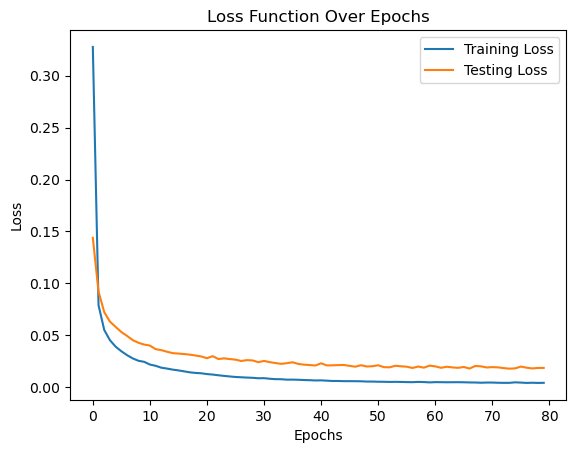

In [34]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.title('Loss Function Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Sample data

In [35]:
new_data = pd.DataFrame(data=[[45, 1, 3, 120, 200, 0, 1, 160, 0, 1.5, 2, 0, 3]], columns=X.columns)


new_data_scaled = scaler.transform(new_data)

predicted_risk = model.predict(new_data_scaled).flatten()[0]


predicted_risk_percentage = round(predicted_risk * 100, 2)
print(f'Predicted Risk of Heart Disease: {predicted_risk_percentage}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Predicted Risk of Heart Disease: 70.32%
